### Decison Trees

Decision tree classifiers are attractive models if we care about interpretability. As the name "decision tree" suggests, we can think of this model as breaking down our data by making a decision based on asking a series of question.

<p align="center">
  <img src="../markdown-images/decision_tree.png" width="700">
</p>

Using the decision algorithm, we start at the root of the tree and split the data on the feature that results in the largest **information gain (IG)**. In an iterative process, we can the repeat this splitting procedure at each child node until the leaves are pure.

### Maximizing Information Gain (IG)

In order to split the nodes at the most informative features, we need to define an objective function that we want to optimize via the tree learning algorithm. Here, our objective function is to maximize the IG at each split, which we define as follows:

$IG(D_p, f) = I(D_p) - \sum_{j=1}^{m} \frac{N_j}{N_p} I(D_j)$

Here, $f$ is the feature to perform the split; $D_p$ and $D_j$ are the dataset of the parent and jth child node; I is our **impurity** measure; $N_p$ is the total number of training examples at the parent node; and $N_j$ is the number of examples in the $jth$ child node. <br/>

The information gain is the difference of the impurity if the parent node and the sume of the child node impurities. The lower the impurities of the child nodes, the larger the information gain. 

For simplicity we can reduce the combinatorial space, most libraries implement the binary decison trees which means that each parent node is split into two child nodes, $D_left$ and $D-right$. <br/>

$IG(D_p, f) = I(D_p) - \frac{N_{left}}{N_p} I(D_{left}) - \frac{N_{right}}{N_p} I(D_{right})$ <br/>

The three impurity measures or splitting criteria that are commonly used in binary decision trees are **Gini impurity** ($I_G$), **entropy** ($I_H$), and the **classification error** ($I_E$). <br/>

The Gini impurity can be understood as a criterion to minimize the probability of misclassification: <br/>
$I_G(t) = \sum_{i=1}^{c} p(i|t)(1-p(i|t)) =1 - \sum_{i=1}^{c} p(i|t)^2 $



In [1]:
# Loading the data
import pandas as pd
import numpy as np
import os

filepath = os.path.join('../data', 'iris.data')
df = pd.read_csv(filepath, header=None, encoding='utf-8') 

## Select the first 100 data
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)


X = df.iloc[0:100, [0,2]].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .9)

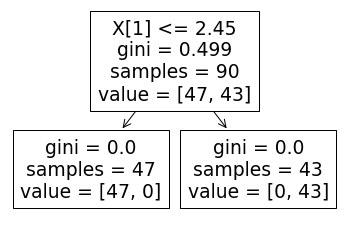

In [6]:
# Building Decision Trees

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree    
import matplotlib.pyplot as plt
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

tree_model.fit(X_train, y_train)
tree.plot_tree(tree_model)
plt.show()

